In [1]:
import pandas as pd
from tqdm import tqdm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pyteomics import mass, parser
import os
os.chdir("/home/robbe/ionbot/")
import OxiAnalysis as OA
tqdm.pandas()

In [2]:
PSMs = pd.read_csv("/home/robbe/ionbot/Voor_vergelijking_OSE/OBV_lijst/ionbotPXD002516.csv")

In [3]:
PSMs["Modification"] = PSMs[PSMs["modifications"].notna()]["modifications"].apply(OA.get_modification)
PSMs["Oxmodded?"] = PSMs["Modification"].apply(OA.oxidatively_modified)


In [4]:
PSMs

,ionbot_match_id,spectrum_title,scan,spectrum_file,precursor_mass,peptide_mass,observed_retention_time,charge,database_peptide,matched_peptide,...,modifications_delta,corrected_retention_time,unexpected_modification,database,psm_score,q-value,PEP,proteins,Modification,Oxmodded?
0,0_6653_2,controllerType=0 controllerNumber=1 scan=10006,10006,131023_Sunil_PPT_Brain_A_01.mgf,1158.62156,1158.62191,2170.63494,2,LAVNMVPFPR,LAVNMVPFPR,...,5|15.9949,2170.63494,NaN,T,0.02528,0.00296,0.22551,TBB1_HUMAN((253-263))((Q9H4B7))||TBB8_HUMAN((2...,[35]oxidation[M],True
1,0_6658_1,controllerType=0 controllerNumber=1 scan=10011,10011,131023_Sunil_PPT_Brain_A_01.mgf,1832.88472,1832.88456,2171.30970,3,TYFPHFDLSHGSAQVK,TYFPHFDLSHGSAQVK,...,0|,2183.86542,NaN,T,0.15405,0.00296,0.14552,HBA_HUMAN((42-58))((P69905))||sp|HBA_HUMAN|((4...,NaN,False
2,0_6683_1,controllerType=0 controllerNumber=1 scan=10039,10039,131023_Sunil_PPT_Brain_A_01.mgf,1489.73264,1489.73473,2175.70476,2,LQGIVSWGSGCAQK,LQGIVSWGSGCAQK,...,11|57.0215,2606.52804,NaN,T,1.88040,0.00296,0.00027,sp|TRY1_BOVIN|((207-221))((sp|TRY1_BOVIN|)),[4]carbamidomethyl[C],False
3,0_6689_2,controllerType=0 controllerNumber=1 scan=10045,10045,131023_Sunil_PPT_Brain_A_01.mgf,1832.88314,1832.88456,2176.51758,3,TYFPHFDLSHGSAQVK,TYFPHFDLSHGSAQVK,...,0|,2183.86542,NaN,T,0.17387,0.00296,0.13579,HBA_HUMAN((42-58))((P69905))||sp|HBA_HUMAN|((4...,NaN,False
4,0_6694_2,controllerType=0 controllerNumber=1 scan=10051,10051,131023_Sunil_PPT_Brain_A_01.mgf,875.51060,875.51164,2177.46510,2,IFLQDIK,IFLQDIK,...,0|,2187.44268,NaN,T,0.27192,0.00296,0.09598,FRIH_HUMAN((81-88))((P02794)),NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341554,0_8455_1,controllerType=0 controllerNumber=1 scan=9941,9941,131121_Sunil_Prot_BrainAmine_AProfile_26.mgf,1733.74582,1733.74788,1685.61558,2,ADDEVDVDGTVEEDLGK,DDEVDVDGTVEEDLGK,...,0|,1669.29684,semi_tryptic,T,3.39634,0.00125,0.00000,ENPL_HUMAN((21-38))((P14625)),semi_tryptic,False
341555,0_8472_1,controllerType=0 controllerNumber=1 scan=9959,9959,131121_Sunil_Prot_BrainAmine_AProfile_26.mgf,1752.94722,1751.94707,1688.18778,4,YVGGQEHFAHLLILR,YVGGQEHFAHLLILR,...,0|,1688.18778,NaN,T,0.76570,0.00125,0.00521,A1AG1_HUMAN((109-124))((P02763)),NaN,False
341556,0_8476_1,controllerType=0 controllerNumber=1 scan=9964,9964,131121_Sunil_Prot_BrainAmine_AProfile_26.mgf,2138.01832,2138.02010,1689.01116,3,TPEVTCVVVDVSHEDPEVK,TPEVTCVVVDVSHEDPEVK,...,6|57.0215,1672.23150,NaN,T,0.54781,0.00125,0.01247,IGHG1_HUMAN((139-158))((P01857))||IGG1_HUMAN((...,[4]carbamidomethyl[C],False
341557,0_8490_1,controllerType=0 controllerNumber=1 scan=9979,9979,131121_Sunil_Prot_BrainAmine_AProfile_26.mgf,1706.81435,1706.81196,1691.19006,2,YVMLPVADQDQCIR,YVMLPVADQDQCIR,...,12|57.0215,1691.19006,NaN,T,0.84817,0.00125,0.00374,HPT_HUMAN((298-312))((P00738)),[4]carbamidomethyl[C],False


In [5]:
OxmoddedPSMs = PSMs[PSMs["Oxmodded?"] == True]

In [6]:
OxmoddedPSMs.shape[0]

25995

25995 Oxmodded PSMs

In [7]:
OxmoddedPSMs_exploded = OxmoddedPSMs.explode("Modification")
OxmoddedPSMs_exploded["Modification_NS"] = OxmoddedPSMs_exploded["Modification"].str[:-3]

In [8]:
OxmoddedPSMs_exploded["Oxmodfilter"] = OxmoddedPSMs_exploded["Modification"].apply(OA.oxidatively_modified)

In [9]:
OxmoddedPSMs_exploded = OxmoddedPSMs_exploded[OxmoddedPSMs_exploded["Oxmodfilter"] == True]

In [10]:
OxmoddedPSMs_exploded

,ionbot_match_id,spectrum_title,scan,spectrum_file,precursor_mass,peptide_mass,observed_retention_time,charge,database_peptide,matched_peptide,...,unexpected_modification,database,psm_score,q-value,PEP,proteins,Modification,Oxmodded?,Modification_NS,Oxmodfilter
0,0_6653_2,controllerType=0 controllerNumber=1 scan=10006,10006,131023_Sunil_PPT_Brain_A_01.mgf,1158.62156,1158.62191,2170.63494,2,LAVNMVPFPR,LAVNMVPFPR,...,NaN,T,0.02528,0.00296,0.22551,TBB1_HUMAN((253-263))((Q9H4B7))||TBB8_HUMAN((2...,[35]oxidation[M],True,[35]oxidation,True
16,0_6908_1,controllerType=0 controllerNumber=1 scan=10286,10286,131023_Sunil_PPT_Brain_A_01.mgf,1183.56882,1183.56952,2212.79172,2,VCNYVSWIK,VCNYVSWIK,...,[35]Oxidation[V],T,0.20652,0.00296,0.12107,sp|TRY1_BOVIN|((229-238))((sp|TRY1_BOVIN|)),[35]Oxidation[V],True,[35]Oxidation,True
19,0_6943_1,controllerType=0 controllerNumber=1 scan=10325,10325,131023_Sunil_PPT_Brain_A_01.mgf,1086.54380,1086.54192,2218.80480,2,MFLSFPTTK,MFLSFPTTK,...,[35]Oxidation[F],T,0.25785,0.00296,0.10092,HBA_HUMAN((33-42))((P69905))||sp|HBA_HUMAN|((3...,[35]Oxidation[F],True,[35]Oxidation,True
23,0_7039_1,controllerType=0 controllerNumber=1 scan=10432,10432,131023_Sunil_PPT_Brain_A_01.mgf,1086.54172,1086.54196,2234.92524,2,MFLSFPTTK,MFLSFPTTK,...,NaN,T,0.25378,0.00296,0.10240,HBA_HUMAN((33-42))((P69905))||sp|HBA_HUMAN|((3...,[35]oxidation[M],True,[35]oxidation,True
32,0_7112_1,controllerType=0 controllerNumber=1 scan=10514,10514,131023_Sunil_PPT_Brain_A_01.mgf,2266.00282,2266.00336,2247.53382,3,SAYPGQITSNMFCAGYLEGGK,SAYPGQITSNMFCAGYLEGGK,...,[35]Oxidation[S],T,1.08101,0.00296,0.00500,sp|TRY1_BOVIN|((170-191))((sp|TRY1_BOVIN|)),[35]Oxidation[S],True,[35]Oxidation,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341519,0_8037_1,controllerType=0 controllerNumber=1 scan=9475,9475,131121_Sunil_Prot_BrainAmine_AProfile_26.mgf,2794.33237,2794.33056,1613.71422,5,LVRPEVDVMCTAFHDNEETFLKK,LVRPEVDVMCTAFHDNEETFLKK,...,[7]Deamidated[F],T,1.25923,0.00125,0.00072,ALBU_HUMAN((139-162))((P02768)),[35]oxidation[M],True,[35]oxidation,True
341524,0_8110_1,controllerType=0 controllerNumber=1 scan=9557,9557,131121_Sunil_Prot_BrainAmine_AProfile_26.mgf,971.47098,971.47112,1626.60720,2,YIYEIAR,YIYEIAR,...,[354]Nitro[Y],T,0.13983,0.00420,0.06201,sp|Q3SZ57((162-169))((sp|Q3SZ57)),[354]Nitro[Y],True,[354]Nitro,True
341533,0_8224_1,controllerType=0 controllerNumber=1 scan=9685,9685,131121_Sunil_Prot_BrainAmine_AProfile_26.mgf,1086.54136,1086.54196,1646.45124,2,MFLSFPTTK,MFLSFPTTK,...,NaN,T,1.17036,0.00125,0.00102,HBA_HUMAN((33-42))((P69905))||sp|HBA_HUMAN|((3...,[35]oxidation[M],True,[35]oxidation,True
341540,0_8285_1,controllerType=0 controllerNumber=1 scan=9754,9754,131121_Sunil_Prot_BrainAmine_AProfile_26.mgf,2794.32887,2794.33056,1657.31328,5,LVRPEVDVMCTAFHDNEETFLKK,LVRPEVDVMCTAFHDNEETFLKK,...,[7]Deamidated[N],T,2.22621,0.00125,0.00001,ALBU_HUMAN((139-162))((P02768)),[35]oxidation[M],True,[35]oxidation,True


In [11]:
Oxmodcounts = OxmoddedPSMs_exploded["Modification_NS"].value_counts()
Oxmodcounts

[35]oxidation                  21216
[35]Oxidation                   2565
[425]Dioxidation                 982
[1918]Carbonyl                   405
[345]Trioxidation                318
[368]Cys->Dha                    230
[1914]Met->AspSA                 167
[354]Nitro                       131
[351]Trp->Kynurenin              114
[1915]Decarboxylation             93
[401]Didehydro                    92
[1922]Pro->HAVA                   82
[359]Pro->pyro-Glu                76
[6]Carboxymethyl                  62
[936]Chlorination                 56
[53]HNE                           45
[206]Delta:H(4)C(3)O(1)           38
[1917]Formylasparagine            35
[1916]Aspartylurea                34
[360]Pro->Pyrrolidinone           31
[344]Arg->GluSA                   17
[1928]Delta:H(10)C(8)O(1)         16
[721]4-ONE                        14
[720]HNE-Delta:H(2)O              14
[378]Carboxyethyl                 14
[288]Trp->Oxolactone              13
[949]3-deoxyglucosone             13
[

In [12]:
Oxmodcounts_no_OxM = Oxmodcounts.drop("[35]oxidation")

In [13]:
df = Oxmodcounts_no_OxM.to_frame().reset_index()

In [14]:
df

,index,Modification_NS
0,[35]Oxidation,2565
1,[425]Dioxidation,982
2,[1918]Carbonyl,405
3,[345]Trioxidation,318
4,[368]Cys->Dha,230
5,[1914]Met->AspSA,167
6,[354]Nitro,131
7,[351]Trp->Kynurenin,114
8,[1915]Decarboxylation,93
9,[401]Didehydro,92


In [15]:
df["Modification_NS"].sum()

5772

5772 Oxidative modifications would not have been able to be found with Comet

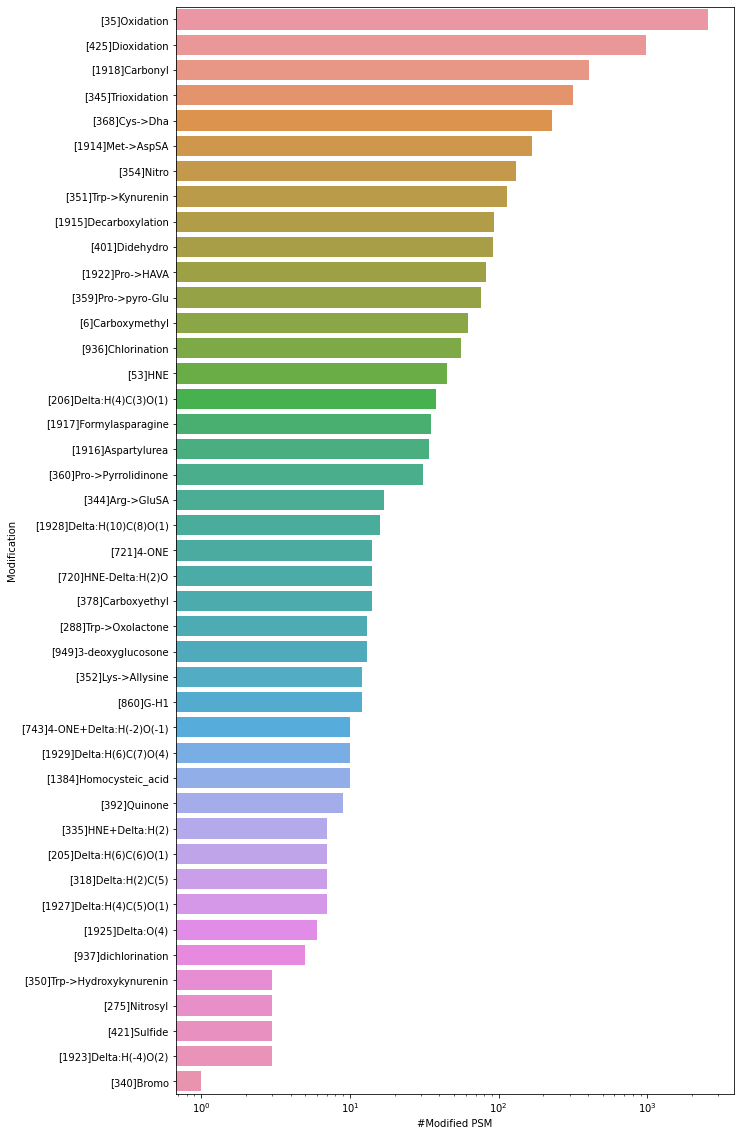

In [20]:
fig, axs =  plt.subplots(figsize=(10,20))
sns.barplot(data=df, x = "Modification_NS", y="index", dodge=False)
axs.set(ylabel="Modification", xlabel="#Modified PSM")
axs.set_xscale("log")
plt.savefig("/home/robbe/ionbot/Images/OxPTMs_rest", dpi=300, bbox_inches="tight")
plt.show()
